In [51]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import vgg16, resnet, inception_v3
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import keras

In [42]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                     zoom_range= 0.2
                                    )

training_dataset = train_generator.flow_from_directory('animals/',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        subset='training'                                               
                                                        )




Found 3000 images belonging to 3 classes.


In [44]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

In [52]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_dataset,
          batch_size=512,
          epochs=3,
      )

Epoch 1/3
94/94 [==============================] - 89s 936ms/step - loss: 0.9275 - accuracy: 0.5197
Epoch 2/3
94/94 [==============================] - 67s 709ms/step - loss: 0.7275 - accuracy: 0.6343
Epoch 3/3
94/94 [==============================] - 62s 659ms/step - loss: 0.6299 - accuracy: 0.6940


In [53]:
model.evaluate(training_dataset)

94/94 [==============================] - 29s 312ms/step - loss: 0.5477 - accuracy: 0.7400


[0.5476824045181274, 0.7400000095367432]

In [113]:
actual_class = training_dataset.class_indices
y_classes = list(actual_class.keys())
y_classes

['cats', 'dogs', 'panda']

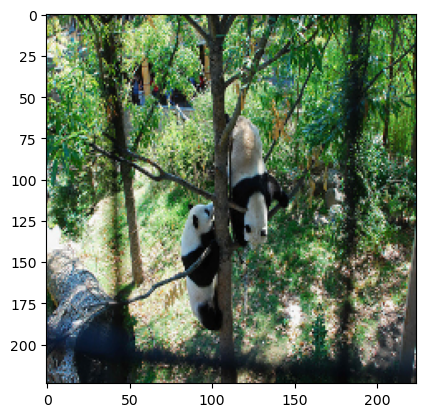

In [98]:
image = cv2.imread('animals/panda/panda_00030.jpg')
image = cv2.resize(image,(224,224))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [114]:
prediction = model.predict(np.expand_dims(image,axis=0))
print("Prediction is : ",y_classes[prediction.argmax(axis=-1)[0]])

1/1 [==============================] - 0s 26ms/step
Prediction is :  panda
